# Assignment 2 Weather
# Author: Andre Hoarau

In [7]:
# We need to import.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [8]:
# Import the CSV file for the weather and make it into a pandas data frame
# Get a feel for the data
# Analyse the data types
weather_data = pd.read_csv("../../PFDA-courseware/assignment/weatherreadings1.csv")
weather_data.head()
weather_data.dtypes
print(weather_data.columns)


Index(['siteId', 'reportStartDateTime', 'reportEndDateTime', 'collectionName',
       'isPublic', 'isLatestVersion', 'observationType', 'softwareType',
       'windDirection', 'relativeHumidity', 'windSpeed_MilePerHour',
       'windSpeed_MetrePerSecond', 'dryBulbTemperature_Fahrenheit',
       'dryBulbTemperature_Celsius', 'wetBulbTemperature_Fahrenheit',
       'wetBulbTemperature_Celsius', 'rainfallAmount_Inch',
       'rainfallAmount_Millimetre', 'rainfallRate_InchPerHour',
       'rainfallRate_MillimetrePerHour', 'airPressure_InchOfMercury',
       'airPressure_Hectopascal', 'dewPointTemperature_Fahrenheit',
       'dewPointTemperature_Celsius', 'isOfficial', 'isDcnn', 'longitude',
       'latitude', 'height', 'id', 'localReportEndDateTime', 'externalSiteId',
       'createdDateTime', 'version', 'externalId'],
      dtype='object')


In [9]:
# I want to change the "reportStartDateTime" from an object to a date.

weather_data["reportStartDateTime"]= pd.to_datetime(weather_data["reportStartDateTime"])
print(weather_data["reportStartDateTime"].dtypes)

'''
weather_data["reportStartDateTime"]= weather_data["reportStartDateTime"].str.split("+").str[0]
This is a rabbit hole I ended up going down
# I also want to seperate the date and the times and remove the +00:00
weather_data[["reportStartDate","reportStartTime"]]= weather_data["reportStartDateTime"].str.split("T",expand= True)
print((weather_data[["reportStartDate","reportStartTime"]].dtypes))

# I know will change the 2 columns to date time
weather_data[["reportStartDate","reportStartTime"]]= pd.to_datetime(weather_data[["reportStartDate","reportStartTime"]])
'''


datetime64[ns, UTC]


'\nweather_data["reportStartDateTime"]= weather_data["reportStartDateTime"].str.split("+").str[0]\nThis is a rabbit hole I ended up going down\n# I also want to seperate the date and the times and remove the +00:00\nweather_data[["reportStartDate","reportStartTime"]]= weather_data["reportStartDateTime"].str.split("T",expand= True)\nprint((weather_data[["reportStartDate","reportStartTime"]].dtypes))\n\n# I know will change the 2 columns to date time\nweather_data[["reportStartDate","reportStartTime"]]= pd.to_datetime(weather_data[["reportStartDate","reportStartTime"]])\n'

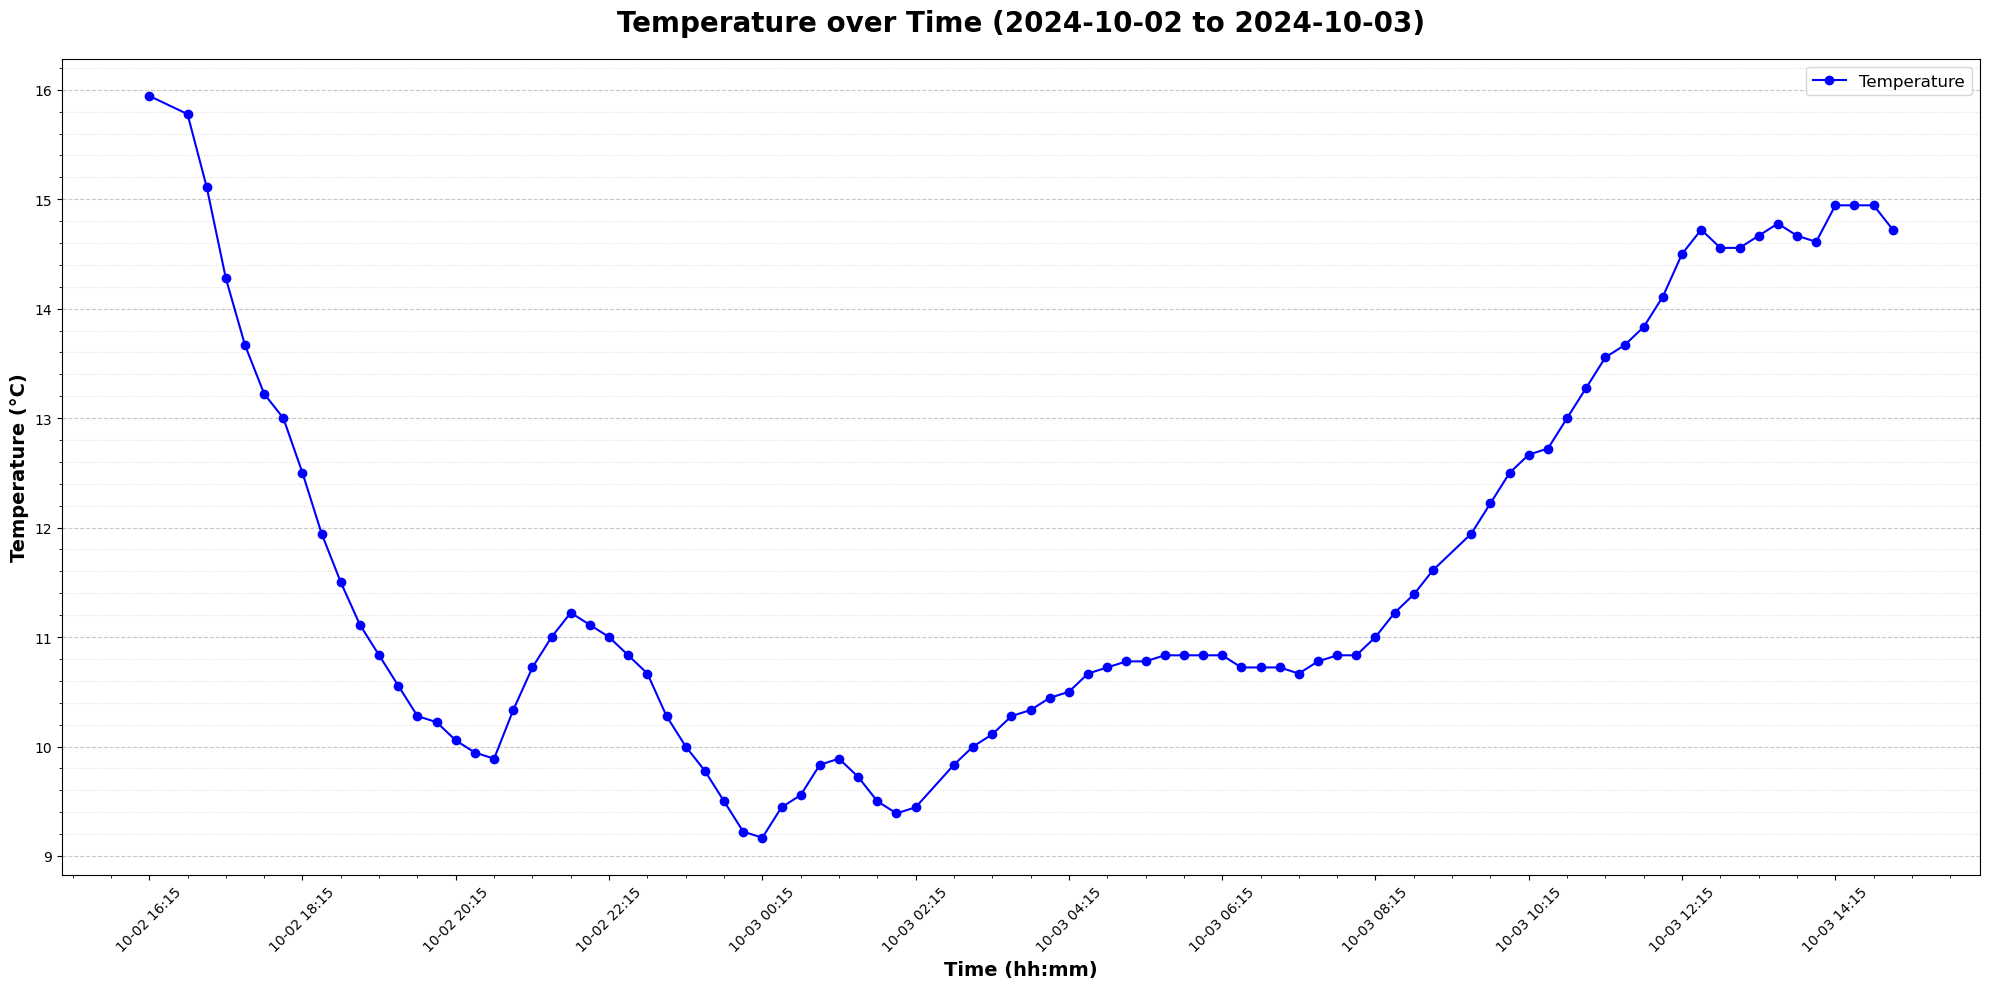

In [10]:

# Set the variables
date = weather_data["reportStartDateTime"]
temperature = weather_data["dryBulbTemperature_Celsius"]

# Create the plot format.
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(date, temperature, marker="o", linestyle="-", color="blue", markersize=6, label="Temperature")

# Add labels and title
ax.set_xlabel('Time (hh:mm)', fontsize=14, fontweight="bold")
ax.set_ylabel('Temperature (°C)', fontsize=14, fontweight="bold")
ax.set_title(
    label="Temperature over Time (2024-10-02 to 2024-10-03)", 
    fontsize=20, fontweight="bold", pad=20
)

# Format the grid on the y-axis
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.minorticks_on()
ax.grid(which="minor", axis="y", linestyle=":", alpha=0.4)  

# Format the x-axis with the dates
x_ticks = pd.date_range(start=date.min(), end=date.max(), freq="2h")
ax.set_xticks(x_ticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))  
plt.xticks(rotation=45, fontsize=10)

# Adjust layout
plt.tight_layout()

# Add a legend
ax.legend(fontsize=12)

# Display the graph
plt.show()


Resources used:
* [Datacamp Tutorial: Importing Data](https://www.datacamp.com/tutorial/pandas-read-csv) - This reminded me how to pull in the CSV and change it to a PANDAS data frame.
* [Simple Plot](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py)- Information on how to get the simple plot done.
* [pandas.DataFrame.dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)- How to get data types in a PANDAS DF.
* [Matplotlib.axes.Axes.plot() in Python](https://www.geeksforgeeks.org/matplotlib-axes-axes-plot-in-python/)- Article on Matplotlib axes by geeksforgeeks.
* [matplotlib.pyplot.xticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks) - Matplotlib documentation on xticks.
* [Matplotlib.dates.DateFormatter class in Python](https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/) -Geeks for geeks article on date formatting.


# End